In [1]:
import os

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

# Leitura e análise inicial dos dados

In [2]:
data_apple = pd.read_csv('./data/SP_Data_Apple.csv')
data_apple['date'] = pd.to_datetime(data_apple['date'], infer_datetime_format=True)
data_apple.head(10)

Unnamed: 0       date   value geo_type     region transportation_type  \
0           0 2020-01-13  100.00     city  Sao Paulo             driving   
1           1 2020-01-14  103.97     city  Sao Paulo             driving   
2           2 2020-01-15  104.59     city  Sao Paulo             driving   
3           3 2020-01-16  104.15     city  Sao Paulo             driving   
4           4 2020-01-17  109.81     city  Sao Paulo             driving   
5           5 2020-01-18  105.41     city  Sao Paulo             driving   
6           6 2020-01-19   85.12     city  Sao Paulo             driving   
7           7 2020-01-20  102.18     city  Sao Paulo             driving   
8           8 2020-01-21  104.80     city  Sao Paulo             driving   
9           9 2020-01-22  103.46     city  Sao Paulo             driving   

  alternative_name         sub-region country  
0        São Paulo  São Paulo (state)  Brazil  
1        São Paulo  São Paulo (state)  Brazil  
2        São Paulo  São Paulo (state)  Brazil  
3        São Paulo  São Paulo (state)  Brazil  
4        São Paulo  São Paulo (state)  Brazil  
5        São Paulo  São Paulo (state)  Brazil  
6        São Paulo  São Paulo (state)  Brazil  
7        São Paulo  São Paulo (state)  Brazil  
8        São Paulo  São Paulo (state)  Brazil  
9        São Paulo  São Paulo (state)  Brazil

In [3]:
data_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           1656 non-null   int64         
 1   date                 1656 non-null   datetime64[ns]
 2   value                1648 non-null   float64       
 3   geo_type             1656 non-null   object        
 4   region               1656 non-null   object        
 5   transportation_type  1656 non-null   object        
 6   alternative_name     1656 non-null   object        
 7   sub-region           828 non-null    object        
 8   country              1656 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 116.6+ KB


Três colunas do Dataset aparentemente representam o mesmo dado. Utilizando o nunique() para descobrir a quantidade de valores únicos em cada tabela, vemos que só existe uma única sub-região e dois tipos de nomes. O nome alternativo utiliza caracteres especiais.

In [4]:
data_apple['region'].nunique()

2

In [5]:
data_apple['sub-region'].nunique()

1

In [6]:
data_apple['alternative_name'].nunique()

2

In [7]:
data_apple_Compacta=data_apple[['date','value','transportation_type','alternative_name','country']]
data_apple_Compacta.head(10)

date   value transportation_type alternative_name country
0 2020-01-13  100.00             driving        São Paulo  Brazil
1 2020-01-14  103.97             driving        São Paulo  Brazil
2 2020-01-15  104.59             driving        São Paulo  Brazil
3 2020-01-16  104.15             driving        São Paulo  Brazil
4 2020-01-17  109.81             driving        São Paulo  Brazil
5 2020-01-18  105.41             driving        São Paulo  Brazil
6 2020-01-19   85.12             driving        São Paulo  Brazil
7 2020-01-20  102.18             driving        São Paulo  Brazil
8 2020-01-21  104.80             driving        São Paulo  Brazil
9 2020-01-22  103.46             driving        São Paulo  Brazil

In [8]:
data_apple_Compacta[data_apple_Compacta.isna().any(axis=1)]

date  value transportation_type    alternative_name country
119 2020-05-11    NaN             driving           São Paulo  Brazil
120 2020-05-12    NaN             driving           São Paulo  Brazil
395 2020-05-11    NaN             transit           São Paulo  Brazil
396 2020-05-12    NaN             transit           São Paulo  Brazil
671 2020-05-11    NaN             walking           São Paulo  Brazil
672 2020-05-12    NaN             walking           São Paulo  Brazil
947 2020-05-11    NaN             driving  São Paulo (Estado)  Brazil
948 2020-05-12    NaN             driving  São Paulo (Estado)  Brazil

Como a parte mais relevante do dado, que é o valor, é justamente aquela que está ausente, optamos por tirar esses dados da tabela.

In [9]:
data_apple_Compacta=data_apple_Compacta.dropna()
data_apple_Compacta[data_apple_Compacta.isna().any(axis=1)]

Empty DataFrame
Columns: [date, value, transportation_type, alternative_name, country]
Index: []

## Traduzindo os dados e colunas

In [10]:
data_apple_Compacta = data_apple_Compacta.rename(columns = {'date':'Data', 'value':'Volume Relativo','transportation_type':'Transporte','alternative_name':'Região','country':'País'})
data_apple_Compacta

Data  Volume Relativo Transporte              Região    País
0    2020-01-13           100.00    driving           São Paulo  Brazil
1    2020-01-14           103.97    driving           São Paulo  Brazil
2    2020-01-15           104.59    driving           São Paulo  Brazil
3    2020-01-16           104.15    driving           São Paulo  Brazil
4    2020-01-17           109.81    driving           São Paulo  Brazil
...         ...              ...        ...                 ...     ...
1651 2020-10-10            57.21    transit  São Paulo (Estado)  Brazil
1652 2020-10-11            39.16    transit  São Paulo (Estado)  Brazil
1653 2020-10-12            45.75    transit  São Paulo (Estado)  Brazil
1654 2020-10-13            72.38    transit  São Paulo (Estado)  Brazil
1655 2020-10-14            75.26    transit  São Paulo (Estado)  Brazil

[1648 rows x 5 columns]

In [11]:
data_apple_Compacta['Transporte'] = data_apple_Compacta['Transporte'].str.replace('driving', 'dirigindo')
data_apple_Compacta['Transporte'] = data_apple_Compacta['Transporte'].str.replace('walking', 'andando')
data_apple_Compacta['Transporte'] = data_apple_Compacta['Transporte'].str.replace('transit', 'transito')
data_apple_Compacta['País'] = data_apple_Compacta['País'].str.replace('Brazil', 'Brasil')
data_apple_Compacta

Data  Volume Relativo Transporte              Região    País
0    2020-01-13           100.00  dirigindo           São Paulo  Brasil
1    2020-01-14           103.97  dirigindo           São Paulo  Brasil
2    2020-01-15           104.59  dirigindo           São Paulo  Brasil
3    2020-01-16           104.15  dirigindo           São Paulo  Brasil
4    2020-01-17           109.81  dirigindo           São Paulo  Brasil
...         ...              ...        ...                 ...     ...
1651 2020-10-10            57.21   transito  São Paulo (Estado)  Brasil
1652 2020-10-11            39.16   transito  São Paulo (Estado)  Brasil
1653 2020-10-12            45.75   transito  São Paulo (Estado)  Brasil
1654 2020-10-13            72.38   transito  São Paulo (Estado)  Brasil
1655 2020-10-14            75.26   transito  São Paulo (Estado)  Brasil

[1648 rows x 5 columns]

In [12]:
data_apple_Compacta=data_apple_Compacta.set_index('Data')



In [13]:
data_apple_Compacta.sort_index()

Volume Relativo Transporte              Região    País
Data                                                              
2020-01-13           100.00  dirigindo           São Paulo  Brasil
2020-01-13           100.00   transito  São Paulo (Estado)  Brasil
2020-01-13           100.00    andando  São Paulo (Estado)  Brasil
2020-01-13           100.00  dirigindo  São Paulo (Estado)  Brasil
2020-01-13           100.00    andando           São Paulo  Brasil
...                     ...        ...                 ...     ...
2020-10-14            79.85    andando           São Paulo  Brasil
2020-10-14            96.95  dirigindo           São Paulo  Brasil
2020-10-14           101.67  dirigindo  São Paulo (Estado)  Brasil
2020-10-14            91.05    andando  São Paulo (Estado)  Brasil
2020-10-14            75.26   transito  São Paulo (Estado)  Brasil

[1648 rows x 4 columns]

## Separando os dados por tipo de transporte

Dirigindo:

In [14]:
apple_dirigindo=data_apple_Compacta[data_apple_Compacta['Transporte'] == 'dirigindo'][['Região','Volume Relativo']]
apple_dirigindo = apple_dirigindo.rename(columns = {'Volume Relativo':'Dirigindo'})
apple_dirigindo.head(10)

Região  Dirigindo
Data                            
2020-01-13  São Paulo     100.00
2020-01-14  São Paulo     103.97
2020-01-15  São Paulo     104.59
2020-01-16  São Paulo     104.15
2020-01-17  São Paulo     109.81
2020-01-18  São Paulo     105.41
2020-01-19  São Paulo      85.12
2020-01-20  São Paulo     102.18
2020-01-21  São Paulo     104.80
2020-01-22  São Paulo     103.46

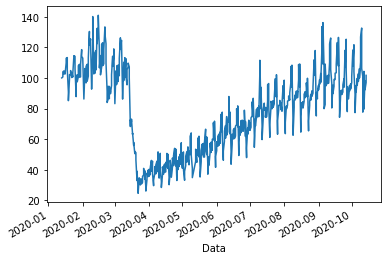

In [15]:
apple_dirigindo['Dirigindo'].plot()

Andando:

In [16]:
apple_andando=data_apple_Compacta[data_apple_Compacta['Transporte'] == 'andando'][['Região','Volume Relativo']]
apple_andando = apple_andando.rename(columns = {'Volume Relativo':'Andando'})
apple_andando.head(10)

Região  Andando
Data                          
2020-01-13  São Paulo   100.00
2020-01-14  São Paulo   111.06
2020-01-15  São Paulo   110.09
2020-01-16  São Paulo   100.63
2020-01-17  São Paulo   105.01
2020-01-18  São Paulo   100.21
2020-01-19  São Paulo    69.45
2020-01-20  São Paulo   106.99
2020-01-21  São Paulo   114.40
2020-01-22  São Paulo   109.23

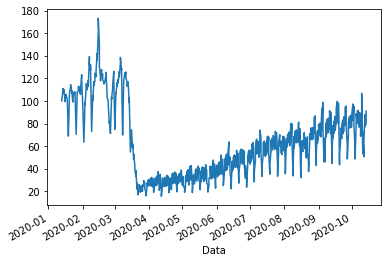

In [17]:
apple_andando['Andando'].plot()

Transito:

In [18]:
apple_transito=data_apple_Compacta[data_apple_Compacta['Transporte'] == 'transito'][['Região','Volume Relativo']]
apple_transito = apple_transito.rename(columns = {'Volume Relativo':'Transito'})
apple_transito.head(10)

Região  Transito
Data                           
2020-01-13  São Paulo    100.00
2020-01-14  São Paulo    103.28
2020-01-15  São Paulo    107.25
2020-01-16  São Paulo    101.29
2020-01-17  São Paulo     96.59
2020-01-18  São Paulo     77.36
2020-01-19  São Paulo     64.54
2020-01-20  São Paulo    105.88
2020-01-21  São Paulo    112.42
2020-01-22  São Paulo    109.34

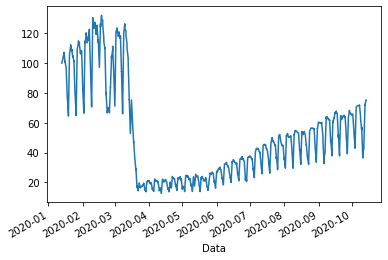

In [19]:
apple_transito['Transito'].plot()

# Forma final apenas com os valores

In [20]:
apple_sp=pd.merge(apple_dirigindo ,apple_andando, on=['Data','Região'])
apple_sp=pd.merge(apple_sp ,apple_transito, on=['Data','Região'])
apple_sp['Média']=(apple_sp['Dirigindo']+apple_sp['Andando']+apple_sp['Transito'])/3
apple_sp

Região  Dirigindo  Andando  Transito       Média
Data                                                                    
2020-01-13           São Paulo     100.00   100.00    100.00  100.000000
2020-01-14           São Paulo     103.97   111.06    103.28  106.103333
2020-01-15           São Paulo     104.59   110.09    107.25  107.310000
2020-01-16           São Paulo     104.15   100.63    101.29  102.023333
2020-01-17           São Paulo     109.81   105.01     96.59  103.803333
...                        ...        ...      ...       ...         ...
2020-10-10  São Paulo (Estado)     132.61   106.68     57.21   98.833333
2020-10-11  São Paulo (Estado)     100.84    72.50     39.16   70.833333
2020-10-12  São Paulo (Estado)     104.30    64.51     45.75   71.520000
2020-10-13  São Paulo (Estado)      98.23    87.93     72.38   86.180000
2020-10-14  São Paulo (Estado)     101.67    91.05     75.26   89.326667

[548 rows x 5 columns]

## Identificando Outliers

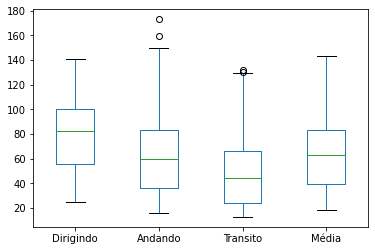

In [21]:
apple_sp[['Dirigindo', 'Andando', 'Transito', 'Média']].plot.box()

In [22]:
apple_sp['andando_zscore'] = (apple_sp['Andando'] - apple_sp['Andando'].mean())/apple_sp['Andando'].std()

apple_sp.sort_values('andando_zscore')

Região  Dirigindo  Andando  Transito       Média  \
Data                                                                       
2020-04-12           São Paulo      28.34    15.69     12.69   18.906667   
2020-03-29           São Paulo      26.01    16.08     13.71   18.600000   
2020-03-22           São Paulo      24.55    17.07     14.36   18.660000   
2020-04-19           São Paulo      30.16    18.89     13.64   20.896667   
2020-05-10           São Paulo      34.79    18.99     13.97   22.583333   
...                        ...        ...      ...       ...         ...   
2020-02-07           São Paulo     130.38   139.27    122.76  130.803333   
2020-02-14           São Paulo     132.44   141.96    125.46  133.286667   
2020-02-16           São Paulo     118.19   150.11     98.81  122.370000   
2020-02-15  São Paulo (Estado)     133.43   159.92    113.76  135.703333   
2020-02-15           São Paulo     140.97   173.15    115.80  143.306667   

            andando_zscore  
Data                        
2020-04-12       -1.509123  
2020-03-29       -1.496951  
2020-03-22       -1.466055  
2020-04-19       -1.409255  
2020-05-10       -1.406134  
...                    ...  
2020-02-07        2.347633  
2020-02-14        2.431584  
2020-02-16        2.685934  
2020-02-15        2.992090  
2020-02-15        3.404980  

[548 rows x 6 columns]

In [23]:
apple_sp['transito_zscore'] = (apple_sp['Transito'] - apple_sp['Transito'].mean())/apple_sp['Transito'].std()

apple_sp.sort_values('transito_zscore')

Região  Dirigindo  Andando  Transito       Média  \
Data                                                                       
2020-04-12           São Paulo      28.34    15.69     12.69   18.906667   
2020-04-12  São Paulo (Estado)      32.64    20.12     13.48   22.080000   
2020-04-19           São Paulo      30.16    18.89     13.64   20.896667   
2020-03-29           São Paulo      26.01    16.08     13.71   18.600000   
2020-05-17           São Paulo      35.21    21.62     13.83   23.553333   
...                        ...        ...      ...       ...         ...   
2020-02-10  São Paulo (Estado)     117.26   100.51    127.74  115.170000   
2020-02-19           São Paulo     122.99   123.85    128.98  125.273333   
2020-02-18  São Paulo (Estado)     106.77   121.89    129.80  119.486667   
2020-02-10           São Paulo     140.13   104.72    130.50  125.116667   
2020-02-18           São Paulo     122.00   127.86    132.14  127.333333   

            andando_zscore  transito_zscore  
Data                                         
2020-04-12       -1.509123        -1.207262  
2020-04-12       -1.370869        -1.183061  
2020-04-19       -1.409255        -1.178160  
2020-03-29       -1.496951        -1.176016  
2020-05-17       -1.324056        -1.172340  
...                    ...              ...  
2020-02-10        1.137989         2.317068  
2020-02-19        1.866397         2.355053  
2020-02-18        1.805228         2.380172  
2020-02-10        1.269377         2.401615  
2020-02-18        1.991543         2.451853  

[548 rows x 7 columns]

Como podemos observar, o único Zscore que caracteriza um outlier é o da Capital do dia 15 de fevereiro. Como não é um dia especial, nem pós quarentena, seu valor individual não é vital para a análise de dados, portanto será retirado do Database.

In [24]:
apple_sp_semOutlier=apple_sp[apple_sp['andando_zscore']<3]
apple_sp_semOutlier=apple_sp_semOutlier.reset_index()
apple_sp_semOutlier.to_csv('./data/2020-11-01_SP_DATA_APPLE_CLEAN', index=False)